[Installation](installing.rst)
[Tutorial](tutorial.ipynb)
[API](api.rst)
[Machine learning](ml.rst)
[Datasets](datasets.ipynb)

## What is Vaex?

Vaex is a python library for lazy **Out-of-Core DataFrames** (similar to Pandas), to visualize and explore big tabular datasets. It can calculate *statistics* such as mean, sum, count, standard deviation etc, on an *N-dimensional grid* up to **a billion** ($10^9$) objects/rows **per second**. Visualization is done using **histograms**, **density plots** and **3d volume rendering**, allowing interactive exploration of big data. Vaex uses memory mapping, zero memory copy policy and lazy computations for best performance (no memory wasted).

# Why vaex
 
 * **Performance:** Works with huge tabular data, process $\gt 10^9$ rows/second
 * **Lazy / Virtual columns:** compute on the fly, without wasting ram
 * **Memory efficient** no memory copies when doing filtering/selections/subsets.
 * **Visualization:** directly supported, a one-liner is often enough.
 * **User friendly API:** You will only need to deal with a Dataset object, and tab completion + docstring will help you out: `ds.mean<tab>`, feels very similar to Pandas.
 * **Lean:** separated into multiple packages
    * `vaex-core`: Dataset and core algorithms, takes numpy arrays as input columns.
    * `vaex-hdf5`: Provides memory mapped numpy arrays to a Dataset.
    * `vaex-arrow`: [Arrow](https://arrow.apache.org/) support for cross language data sharing.
    * `vaex-viz`: Visualization based on matplotlib.
    * `vaex-jupyter`: Interactive visualization based on Jupyter widgets / ipywidgets, bqplot, ipyvolume and ipyleaflet.
    * `vaex-astro`: Astronomy related transformations and FITS file support.
    * `vaex-server`: Provides a server to access a dataset remotely.
    * `vaex-distributed`: (Proof of concept) combined multiple servers / cluster into a single dataset for distributed computations.
    * `vaex-qt`: Program written using Qt GUI.
    * `vaex`: meta package that installs all of the above.
    * `vaex-ml`: [Machine learning](ml.ipynb)

 * **Jupyter integration**: vaex-jupyter will give you interactive visualization and selection in the Jupyter notebook and Jupyter lab.

## Installation

Using conda: 

 * `conda install -c conda-forge vaex`

Using pip:

 * `pip install --upgrade vaex`
  
Or read the [detailed instructions](installing.ipynb)

# Getting started

We assuming you have installed vaex, and are running a [Jupyter notebook server](https://jupyter.readthedocs.io/en/latest/running.html). We start by importing vaex and ask it to give us sample example dataset.

In [36]:
import vaex
ds = vaex.example()  # open the example dataset provided with vaex

Instead, you can [download some larger datasets](datasets), or [read in your csv file](api.rst#vaex.from_csv).

In [49]:
ds  # will pretty print a table

Using [square brackets[]](api.rst#vaex.dataset.Dataset.__getitem__), we can easily filter or get different views on the dataset.

In [20]:
ds_negative = ds[ds.x < 0]  # easily filter your dataset, without making a copy
ds_negative[:5][['x', 'y']]  # take the first five rows, and only the 'x' and 'y' column (no memory copy!)

#,x,y
0,-0.77747076699999995,2.1062629199999998
1,-7.0673780400000004,1.31737781
2,-5.17174435,7.8291530600000003
3,-15.953885100000001,5.7712588299999998
4,-12.3994961,13.9181805


When dealing with huge datasets, say a billion rows ($10^9$), computations with the data can waste memory, up to 8 GB for a new column. Instead, vaex uses lazy computation, only a representation of the computation is stored, and computations done on the fly when needed. Even though, you can just many of the numpy functions, as if it was a normal array.

In [21]:
import numpy as np
# creates an expression (nothing is computed)
r = np.sqrt(ds.x**2 + ds.y**2 + ds.z**2)
r  # for convinience, we print out some values

<vaex.expression.Expression(expressions='sqrt((((x) ** (2)) + ((y) ** (2))) + ((z) ** (2)))')> instance at 0x110e6ec88 [2.96554503966, 5.77829281049, 6.9907960395, 9.43184275271, 0.882561312135 ... (total 330000 values) ... 7.45383176151, 15.3984124911, 8.86425027393, 17.601047186, 14.540181525] 

These expressions can be added to the dataset, creating what we call a *virtual column*. These virtual columns are simular to normal columns, except they do not waste memory.

In [22]:
ds['r'] = r  # add a (virtual) column that will be computed on the fly
ds.mean(ds.x), ds.mean(ds.r)  # calculate statistics on normal and virtual columns

(-0.067131491264005971, 9.407082338299773)

One of the core features of vaex is its ability to calculate statistics on a regular (N-dimensional) grid. The dimensions of the grid are specified by the binby argument (analogous to SQL's grouby), and the shape and limits.

In [15]:
ds.mean(ds.r, binby=ds.x, shape=32, limits=[-10, 10]) # create statistics on a regular grid (1d)

array([ 15.01058183,  14.43693006,  13.72923338,  12.90294499,
        11.86615103,  11.03563695,  10.12162553,   9.2969267 ,
         8.58250973,   7.86602644,   7.19568442,   6.55738773,
         6.01942499,   5.51462457,   5.15798991,   4.8274218 ,
         4.7346551 ,   5.1343761 ,   5.46017944,   6.02199777,
         6.54132124,   7.27025256,   7.99780777,   8.55188217,
         9.30286584,   9.97067561,  10.81633293,  11.60615795,
        12.33813552,  13.10488982,  13.86868565,  14.60577266])

In [23]:
ds.mean(ds.r, binby=[ds.x, ds.y], shape=32, limits=[-10, 10]) # or 2d
ds.count(ds.r, binby=[ds.x, ds.y], shape=32, limits=[-10, 10]) # or 2d counts/histogram

array([[ 22.,  33.,  37., ...,  58.,  38.,  45.],
       [ 37.,  36.,  47., ...,  52.,  36.,  53.],
       [ 34.,  42.,  47., ...,  59.,  44.,  56.],
       ..., 
       [ 73.,  73.,  84., ...,  41.,  40.,  37.],
       [ 53.,  58.,  63., ...,  34.,  35.,  28.],
       [ 51.,  32.,  46., ...,  47.,  33.,  36.]])

These one and two dimensional grids can be visualized using any plotting library, such as matplotlib, but the setup can be tedious. For convenience we can use [plot1d](api.rst#vaex.dataset.Dataset.plot1d), [plot](api.rst#vaex.dataset.Dataset.plot), or see the [list of plotting commands](api.rst#quick-list-for-visualization)

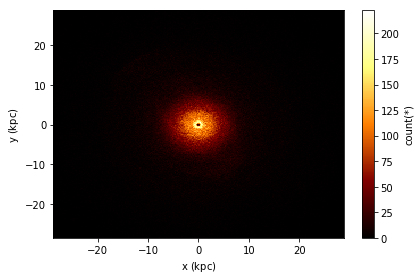

In [17]:
ds.plot(ds.x, ds.y, show=True);  # make a plot quickly

## Continue
[Continue the tutorial here](tutorial.ipynb)